In [576]:
# Dependencies

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from matplotlib import style
style.use("ggplot")

!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tweepy
import time
import json
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [577]:
# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [578]:
# Target Term
BBCWorld_target_user = "@BBCWorld"

In [579]:
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

tweet_list = []
time_list = []
results_list = []

## Array of NEWS Media
##NEWS_Media = {}
## Convert Train Delay object into a series
#NEWS_Media_pd = pd.Series(NEWS_Media)
#NEWS_Media_pd
##NEWS_name = 'BBCWorld_target_user'

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for user in range(1, 6):


    # Get all tweets from home feed
    public_tweets = api.user_timeline(BBCWorld_target_user, page=x)
     

    for tweet in public_tweets:
       # print(json.dumps(tweet, sort_keys=True, indent=4))
    
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

         
        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        tweet_list.append(tweet["text"])
        time_list.append(tweet["created_at"])
        
        # Add to Counter
        #counter = counter + 1
      ## add new midia to the list...
        
         # Create a dictionaty of results
    user_results = {
         "TweetPage": BBCWorld_target_user,
         "Tweets": tweet_list,
         "Time": time_list,
         "Compound Score": compound_list,
         "Postive Score": positive_list,
         "Neutral Score": neutral_list,
         "Negative Score": negative_list
     }
        #if(NEWS_name in public_tweets):
         # NEWS_Media[NEWS_name] = 1
    results_list.append(user_results)     
        # Print Tweets
    print(f'tweet {counter}:{results} {tweet["text"]}')

        # Add to Counter
    counter = counter + 1
    
    
 

tweet 1:{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compound': -0.5423} US officer quits after harassment over Puerto Rico shirt https://t.co/l9waVTw1op
tweet 2:{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compound': -0.5423} US officer quits after harassment over Puerto Rico shirt https://t.co/l9waVTw1op
tweet 3:{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compound': -0.5423} US officer quits after harassment over Puerto Rico shirt https://t.co/l9waVTw1op
tweet 4:{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compound': -0.5423} US officer quits after harassment over Puerto Rico shirt https://t.co/l9waVTw1op
tweet 5:{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compound': -0.5423} US officer quits after harassment over Puerto Rico shirt https://t.co/l9waVTw1op


In [580]:
results_df = pd.DataFrame(results_list).set_index("TweetPage").round(3)
results_df

,Compound Score,Negative Score,Neutral Score,Postive Score,Time,Tweets
TweetPage,,,,,,
@BBCWorld,"[0.0, 0.0, -0.7003, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.094...","[Thu Jul 12 23:35:27 +0000 2018, Thu Jul 12 23...",[Kylie Jenner: How the reality teen founded a ...
@BBCWorld,"[0.0, 0.0, -0.7003, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.094...","[Thu Jul 12 23:35:27 +0000 2018, Thu Jul 12 23...",[Kylie Jenner: How the reality teen founded a ...
@BBCWorld,"[0.0, 0.0, -0.7003, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.094...","[Thu Jul 12 23:35:27 +0000 2018, Thu Jul 12 23...",[Kylie Jenner: How the reality teen founded a ...
@BBCWorld,"[0.0, 0.0, -0.7003, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.094...","[Thu Jul 12 23:35:27 +0000 2018, Thu Jul 12 23...",[Kylie Jenner: How the reality teen founded a ...
@BBCWorld,"[0.0, 0.0, -0.7003, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.453, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.094...","[Thu Jul 12 23:35:27 +0000 2018, Thu Jul 12 23...",[Kylie Jenner: How the reality teen founded a ...


In [581]:
compound = results["compound"]
pos = results["pos"]
neu = results["neu"]
neg = results["neg"]

In [582]:
# Print Analysis
print(BBCWorld_target_user)
print("Compound Score:", compound)
print("Positive Score:", pos)
print("Neutral Score:", neu)
print("Negative Score: ", neg)

@BBCWorld
Compound Score: -0.5423
Positive Score: 0.0
Neutral Score: 0.72
Negative Score:  0.28


In [583]:
#print(f"COMPOUND: {compound_list}")
#print(f"POSITIVE: {positive_list}")
#print(f"NEGATIVE:{negative_list}")

In [584]:
source_sum={}
source_sum ["BBC"] = int(sum(compound_list))
#source_sum

source_DET={}
source_DET ["BBC"] = compound_list.copy()
#source_DET

In [585]:
results_df.to_csv('BBCWorld.csv',sep='\t')

#x_vals = sentiments_pd["Tweets Ago"]
#y_vals = sentiments_pd["Compound"]

#plot compound
x_vals = [len(compound_list) - x for x in range(len(compound_list))]
plt.xlim([max(x_vals),min(x_vals)])
y_vals = compound_list
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.10,
         alpha=0.8)

#plot positive
y_vals = positive_list
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.10,
         alpha=0.8)

#plot negative
#x_vals = [x for x in range(len(compound_list))] #I don't need this line because it already been used in compound
y_vals = negative_list
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.10,
         alpha=0.8)

plt.legend(['compound','positive','negative'],loc=1)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

In [586]:
# Target Term
CBSNews_target_user = "@CBSNews"

In [587]:
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

tweet_list = []
time_list = []
results_list = []

## Array of NEWS Media
##NEWS_Media = {}
## Convert Train Delay object into a series
#NEWS_Media_pd = pd.Series(NEWS_Media)
#NEWS_Media_pd
##NEWS_name = 'BBCWorld_target_user'

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(CBSNews_target_user, page=x)

    for tweet in public_tweets:
       # print(json.dumps(tweet, sort_keys=True, indent=4))
    
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

         # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        tweet_list.append(tweet["text"])
        time_list.append(tweet["created_at"])
        
        
        # Add each value to the appropriate list
       # compound_list.append(compound)
       # positive_list.append(pos)
       # negative_list.append(neg)
        
        
             
         # Create a dictionaty of results
    user_results = {
         "TweetPage": CBSNews_target_user,
         "Tweets": tweet_list,
         "Time": time_list,
         "Compound Score": compound_list,
         "Postive Score": positive_list,
         "Neutral Score": neutral_list,
         "Negative Score": negative_list
     }
         
      ## add new midia to the list...
        
       ## if(NEWS_name in public_tweets):
       ##   NEWS_Media[NEWS_name] = 1
    results_list.append(user_results)
            
        # Print Tweets
    print(f'tweet {counter}:{results} {tweet["text"]}')

        # Add to Counter
    counter = counter + 1

tweet 1:{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.5859} Angelique Kerber beats Serena Williams to win Wimbledon https://t.co/pF5K7ZEO7b https://t.co/lAguseYhNG
tweet 2:{'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'compound': -0.5574} A Martha's Vineyard bus driver has been fired for telling a man he wasn't picked up because he's black… https://t.co/001kPmquQi
tweet 3:{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} "The world has really changed" when it comes to online dating https://t.co/3EW2UXkRIg https://t.co/Jv3hPLmhiY
tweet 4:{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} Russians relied on bitcoin to finance election hacking, prosecutors say https://t.co/A8ok3FK0vV https://t.co/O7ND6SbeNS
tweet 5:{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.6124} LeSean McCoy's ex-girlfriend suspected NFL star was involved in her attack, 911 call reveals https://t.co/vYGJPWjMVw https://t.co/CM69yl22HQ


In [588]:
# Create DataFrame from Results List
results_df = pd.DataFrame(results_list).set_index("TweetPage").round(3)
results_df

,Compound Score,Negative Score,Neutral Score,Postive Score,Time,Tweets
TweetPage,,,,,,
@CBSNews,"[-0.6705, 0.0, -0.4404, 0.0, -0.5423, -0.2732,...","[0.273, 0.0, 0.244, 0.0, 0.243, 0.139, 0.18, 0...","[0.727, 1.0, 0.756, 1.0, 0.757, 0.861, 0.688, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.132, 0.0, 0.0...","[Sun Jul 15 03:48:03 +0000 2018, Sun Jul 15 03...","[Police, neighbors shed light on Delaware fami..."
@CBSNews,"[-0.6705, 0.0, -0.4404, 0.0, -0.5423, -0.2732,...","[0.273, 0.0, 0.244, 0.0, 0.243, 0.139, 0.18, 0...","[0.727, 1.0, 0.756, 1.0, 0.757, 0.861, 0.688, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.132, 0.0, 0.0...","[Sun Jul 15 03:48:03 +0000 2018, Sun Jul 15 03...","[Police, neighbors shed light on Delaware fami..."
@CBSNews,"[-0.6705, 0.0, -0.4404, 0.0, -0.5423, -0.2732,...","[0.273, 0.0, 0.244, 0.0, 0.243, 0.139, 0.18, 0...","[0.727, 1.0, 0.756, 1.0, 0.757, 0.861, 0.688, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.132, 0.0, 0.0...","[Sun Jul 15 03:48:03 +0000 2018, Sun Jul 15 03...","[Police, neighbors shed light on Delaware fami..."
@CBSNews,"[-0.6705, 0.0, -0.4404, 0.0, -0.5423, -0.2732,...","[0.273, 0.0, 0.244, 0.0, 0.243, 0.139, 0.18, 0...","[0.727, 1.0, 0.756, 1.0, 0.757, 0.861, 0.688, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.132, 0.0, 0.0...","[Sun Jul 15 03:48:03 +0000 2018, Sun Jul 15 03...","[Police, neighbors shed light on Delaware fami..."
@CBSNews,"[-0.6705, 0.0, -0.4404, 0.0, -0.5423, -0.2732,...","[0.273, 0.0, 0.244, 0.0, 0.243, 0.139, 0.18, 0...","[0.727, 1.0, 0.756, 1.0, 0.757, 0.861, 0.688, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.132, 0.0, 0.0...","[Sun Jul 15 03:48:03 +0000 2018, Sun Jul 15 03...","[Police, neighbors shed light on Delaware fami..."


In [589]:
compound = results["compound"]
pos = results["pos"]
neu = results["neu"]
neg = results["neg"]

In [590]:
results_df.to_csv('CBSNews.csv',sep='\t')

In [591]:
print(CBSNews_target_user)
print("Compound Score:", compound)
print("Positive Score:", pos)
print("Neutral Score:", neu)
print("Negative Score: ", neg)

@CBSNews
Compound Score: -0.6124
Positive Score: 0.0
Neutral Score: 0.737
Negative Score:  0.263


In [592]:

source_sum ["CBS"] = int(sum(compound_list))
#source_sum


source_DET ["CBS"] = compound_list.copy()
#source_DET

In [593]:
# Target Term
CNN_target_user = "@CNN"

In [594]:
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

tweet_list = []
time_list = []
results_list = []

## Array of NEWS Media
##NEWS_Media = {}
## Convert Train Delay object into a series
#NEWS_Media_pd = pd.Series(NEWS_Media)
#NEWS_Media_pd
##NEWS_name = 'BBCWorld_target_user'

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(CNN_target_user, page=x)

    for tweet in public_tweets:
       # print(json.dumps(tweet, sort_keys=True, indent=4))
    
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

         # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        tweet_list.append(tweet["text"])
        time_list.append(tweet["created_at"])
         
         # Create a dictionaty of results
    user_results = {
         "TweetPage": CNN_target_user,
         "Tweets": tweet_list,
         "Time": time_list,
         "Compound Score": compound_list,
         "Postive Score": positive_list,
         "Neutral Score": neutral_list,
         "Negative Score": negative_list
     }
    
    results_list.append(user_results)
        # Print Tweets
    print(f'tweet {counter}:{results} {tweet["text"]}')

        # Add to Counter
    counter = counter + 1

tweet 1:{'neg': 0.214, 'neu': 0.786, 'pos': 0.0, 'compound': -0.4588} McDonald's pulls salads from 3,000 restaurants after parasite sickens dozens https://t.co/ZCsfrNPFHV https://t.co/GJbNdy1nf7
tweet 2:{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} Belgium beats England 2-0, finishing third place in the World Cup https://t.co/CgOfxgNZCd https://t.co/Rag2LuM3bW
tweet 3:{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} The US Navy has expanded its hair rules for female sailors, now permitting braids, ponytails and lock hairstyles… https://t.co/dOUdRk9UTb
tweet 4:{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} Mysterious burns on teen's face caused by brush with toxic plant https://t.co/oHEvX9UAW9 https://t.co/bU0ztER1VM
tweet 5:{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.5574} Republicans praise ex-FBI lawyer Lisa Page's testimony one day after the heated Peter Strzok hearing… https://t.co/9CWHzrApH9


In [595]:
# Create DataFrame from Results List
results_df = pd.DataFrame(results_list).set_index("TweetPage").round(3)
results_df

,Compound Score,Negative Score,Neutral Score,Postive Score,Time,Tweets
TweetPage,,,,,,
@CNN,"[0.0, -0.2263, 0.0, 0.0, -0.34, 0.0, -0.6705, ...","[0.0, 0.101, 0.0, 0.0, 0.226, 0.0, 0.268, 0.0,...","[1.0, 0.899, 1.0, 1.0, 0.66, 1.0, 0.732, 0.783...","[0.0, 0.0, 0.0, 0.0, 0.113, 0.0, 0.0, 0.217, 0...","[Sun Jul 15 04:00:20 +0000 2018, Sun Jul 15 03...",[Jean-Eric Vergne clinches Formula E title for...
@CNN,"[0.0, -0.2263, 0.0, 0.0, -0.34, 0.0, -0.6705, ...","[0.0, 0.101, 0.0, 0.0, 0.226, 0.0, 0.268, 0.0,...","[1.0, 0.899, 1.0, 1.0, 0.66, 1.0, 0.732, 0.783...","[0.0, 0.0, 0.0, 0.0, 0.113, 0.0, 0.0, 0.217, 0...","[Sun Jul 15 04:00:20 +0000 2018, Sun Jul 15 03...",[Jean-Eric Vergne clinches Formula E title for...
@CNN,"[0.0, -0.2263, 0.0, 0.0, -0.34, 0.0, -0.6705, ...","[0.0, 0.101, 0.0, 0.0, 0.226, 0.0, 0.268, 0.0,...","[1.0, 0.899, 1.0, 1.0, 0.66, 1.0, 0.732, 0.783...","[0.0, 0.0, 0.0, 0.0, 0.113, 0.0, 0.0, 0.217, 0...","[Sun Jul 15 04:00:20 +0000 2018, Sun Jul 15 03...",[Jean-Eric Vergne clinches Formula E title for...
@CNN,"[0.0, -0.2263, 0.0, 0.0, -0.34, 0.0, -0.6705, ...","[0.0, 0.101, 0.0, 0.0, 0.226, 0.0, 0.268, 0.0,...","[1.0, 0.899, 1.0, 1.0, 0.66, 1.0, 0.732, 0.783...","[0.0, 0.0, 0.0, 0.0, 0.113, 0.0, 0.0, 0.217, 0...","[Sun Jul 15 04:00:20 +0000 2018, Sun Jul 15 03...",[Jean-Eric Vergne clinches Formula E title for...
@CNN,"[0.0, -0.2263, 0.0, 0.0, -0.34, 0.0, -0.6705, ...","[0.0, 0.101, 0.0, 0.0, 0.226, 0.0, 0.268, 0.0,...","[1.0, 0.899, 1.0, 1.0, 0.66, 1.0, 0.732, 0.783...","[0.0, 0.0, 0.0, 0.0, 0.113, 0.0, 0.0, 0.217, 0...","[Sun Jul 15 04:00:20 +0000 2018, Sun Jul 15 03...",[Jean-Eric Vergne clinches Formula E title for...


In [596]:
compound = results["compound"]
pos = results["pos"]
neu = results["neu"]
neg = results["neg"]


In [597]:
results_df.to_csv('CNN.csv',sep='\t')

In [598]:
print(CNN_target_user)
print("Compound Score:", compound)
print("Positive Score:", pos)
print("Neutral Score:", neu)
print("Negative Score: ", neg)

@CNN
Compound Score: 0.5574
Positive Score: 0.194
Neutral Score: 0.806
Negative Score:  0.0


In [599]:
source_sum ["CNN"] = int(sum(compound_list))
#source_sum


source_DET ["CNN"] = compound_list.copy()
#source_DET

In [600]:
# Target Term
FoxNews_target_user = "@FoxNews"

In [601]:
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

tweet_list = []
time_list = []
results_list = []


# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(FoxNews_target_user, page=x)

    for tweet in public_tweets:
       # print(json.dumps(tweet, sort_keys=True, indent=4))
    
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

         # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        tweet_list.append(tweet["text"])
        time_list.append(tweet["created_at"])
         
             # Create a dictionaty of results
    user_results = {
         "TweetPage": FoxNews_target_user,
         "Tweets": tweet_list,
         "Time": time_list,
         "Compound Score": compound_list,
         "Postive Score": positive_list,
         "Neutral Score": neutral_list,
         "Negative Score": negative_list
     }
    
    results_list.append(user_results)
            
        # Print Tweets
    print(f'tweet {counter}:{results} {tweet["text"]}')

        # Add to Counter
    counter = counter + 1

tweet 1:{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.5423} Judge has second thoughts hours after praising Trump administration for family reunifications https://t.co/OLfCTYNaCo
tweet 2:{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.6369} Florida man warns about saltwater poisoning after dog dies days after beach trip https://t.co/BZqLVmwPFq
tweet 3:{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} On an all-new 'OBJECTified,' @KrisJenner sits down with @harveylevintmz to discuss her journey – and the events tha… https://t.co/H9ZQ9mTEMg
tweet 4:{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.25} Alina Polyakova: "Putin is going to want to have an olive branch that he can extend to @POTUS to say, 'look I'm a t… https://t.co/hkwcWuI7hh
tweet 5:{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.128} Chris Wallace Announces Exclusive Interview With Vladimir Putin Monday After Trump Summit https://t.co/X4a3okDE8C


In [602]:
# Create DataFrame from Results List
results_df = pd.DataFrame(results_list).set_index("TweetPage").round(3)
results_df

,Compound Score,Negative Score,Neutral Score,Postive Score,Time,Tweets
TweetPage,,,,,,
@FoxNews,"[-0.7271, 0.3612, -0.5106, 0.0, 0.0, 0.4588, 0...","[0.276, 0.0, 0.171, 0.0, 0.0, 0.0, 0.0, 0.195,...","[0.724, 0.828, 0.829, 1.0, 1.0, 0.87, 1.0, 0.8...","[0.0, 0.172, 0.0, 0.0, 0.0, 0.13, 0.0, 0.0, 0....","[Sun Jul 15 04:01:00 +0000 2018, Sun Jul 15 03...",[.@RepDeSantis: “I think Strzok’s testimony re...
@FoxNews,"[-0.7271, 0.3612, -0.5106, 0.0, 0.0, 0.4588, 0...","[0.276, 0.0, 0.171, 0.0, 0.0, 0.0, 0.0, 0.195,...","[0.724, 0.828, 0.829, 1.0, 1.0, 0.87, 1.0, 0.8...","[0.0, 0.172, 0.0, 0.0, 0.0, 0.13, 0.0, 0.0, 0....","[Sun Jul 15 04:01:00 +0000 2018, Sun Jul 15 03...",[.@RepDeSantis: “I think Strzok’s testimony re...
@FoxNews,"[-0.7271, 0.3612, -0.5106, 0.0, 0.0, 0.4588, 0...","[0.276, 0.0, 0.171, 0.0, 0.0, 0.0, 0.0, 0.195,...","[0.724, 0.828, 0.829, 1.0, 1.0, 0.87, 1.0, 0.8...","[0.0, 0.172, 0.0, 0.0, 0.0, 0.13, 0.0, 0.0, 0....","[Sun Jul 15 04:01:00 +0000 2018, Sun Jul 15 03...",[.@RepDeSantis: “I think Strzok’s testimony re...
@FoxNews,"[-0.7271, 0.3612, -0.5106, 0.0, 0.0, 0.4588, 0...","[0.276, 0.0, 0.171, 0.0, 0.0, 0.0, 0.0, 0.195,...","[0.724, 0.828, 0.829, 1.0, 1.0, 0.87, 1.0, 0.8...","[0.0, 0.172, 0.0, 0.0, 0.0, 0.13, 0.0, 0.0, 0....","[Sun Jul 15 04:01:00 +0000 2018, Sun Jul 15 03...",[.@RepDeSantis: “I think Strzok’s testimony re...
@FoxNews,"[-0.7271, 0.3612, -0.5106, 0.0, 0.0, 0.4588, 0...","[0.276, 0.0, 0.171, 0.0, 0.0, 0.0, 0.0, 0.195,...","[0.724, 0.828, 0.829, 1.0, 1.0, 0.87, 1.0, 0.8...","[0.0, 0.172, 0.0, 0.0, 0.0, 0.13, 0.0, 0.0, 0....","[Sun Jul 15 04:01:00 +0000 2018, Sun Jul 15 03...",[.@RepDeSantis: “I think Strzok’s testimony re...


In [603]:
compound = results["compound"]
pos = results["pos"]
neu = results["neu"]
neg = results["neg"]

print(FoxNews_target_user)
print("Compound Score:", compound)
print("Positive Score:", pos)
print("Neutral Score:", neu)
print("Negative Score: ", neg)

@FoxNews
Compound Score: 0.128
Positive Score: 0.111
Neutral Score: 0.889
Negative Score:  0.0


In [604]:
results_df.to_csv('FoxNews.csv',sep='\t')

In [605]:
source_sum ["FOX"] = int(sum(compound_list))
#source_sum

source_DET ["FOX"] = compound_list.copy()
#source_DET

In [606]:
# Target Term
nytimes_target_user = "@nytimes"

In [607]:
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

tweet_list = []
time_list = []
results_list = []


## Array of NEWS Media
##NEWS_Media = {}
## Convert Train Delay object into a series
#NEWS_Media_pd = pd.Series(NEWS_Media)
#NEWS_Media_pd
##NEWS_name = 'BBCWorld_target_user'

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(nytimes_target_user, page=x)
    for tweet in public_tweets:
       # print(json.dumps(tweet, sort_keys=True, indent=4))
    
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

         # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        tweet_list.append(tweet["text"])
        time_list.append(tweet["created_at"])
         
            # Create a dictionaty of results
    user_results = {
         "TweetPage": nytimes_target_user,
         "Tweets": tweet_list,
         "Time": time_list,
         "Compound Score": compound_list,
         "Postive Score": positive_list,
         "Neutral Score": neutral_list,
         "Negative Score": negative_list
     }
    
    results_list.append(user_results)
            
        # Print Tweets
    print(f'tweet {counter}:{results} {tweet["text"]}')

        # Add to Counter
    counter = counter + 1

        
#users_result={}

tweet 1:{'neg': 0.323, 'neu': 0.538, 'pos': 0.14, 'compound': -0.5267} news analysis: Forget a Fast Car. Creativity Is the New Midlife Crisis Cure. https://t.co/7nV0h9rpY2
tweet 2:{'neg': 0.083, 'neu': 0.827, 'pos': 0.09, 'compound': 0.0387} “Without you I am like a coloring book with no color. I am the structure, but you are the color." https://t.co/TXJ1qNpcEF
tweet 3:{'neg': 0.141, 'neu': 0.563, 'pos': 0.296, 'compound': 0.4939} Found: A 2,000-year-old sarcophagus that was perfectly sealed.
Inside: Unclear. https://t.co/Lm9p1Gy87I
tweet 4:{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.6369} RT @nytimesarts: The director of the "Whitney" documentary explains how he got her family to open up about her childhood abuse. https://t.c…
tweet 5:{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4019} RT @nytgraphics: How Russia hacked the D.N.C. and Hillary Clinton’s presidential campaign in 2016. https://t.co/6oO8BdTmDN


In [608]:
    # Create DataFrame from Results List
results_df = pd.DataFrame(results_list).set_index("TweetPage").round(3)
results_df

,Compound Score,Negative Score,Neutral Score,Postive Score,Time,Tweets
TweetPage,,,,,,
@nytimes,"[0.0, 0.2003, 0.3612, 0.0, 0.4019, 0.7906, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.071, 0.0...","[1.0, 0.921, 0.889, 1.0, 0.886, 0.731, 1.0, 0....","[0.0, 0.079, 0.111, 0.0, 0.114, 0.269, 0.0, 0....","[Sun Jul 15 03:54:49 +0000 2018, Sun Jul 15 03...","[Essay: Croatians Savor the Present, but Keep ..."
@nytimes,"[0.0, 0.2003, 0.3612, 0.0, 0.4019, 0.7906, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.071, 0.0...","[1.0, 0.921, 0.889, 1.0, 0.886, 0.731, 1.0, 0....","[0.0, 0.079, 0.111, 0.0, 0.114, 0.269, 0.0, 0....","[Sun Jul 15 03:54:49 +0000 2018, Sun Jul 15 03...","[Essay: Croatians Savor the Present, but Keep ..."
@nytimes,"[0.0, 0.2003, 0.3612, 0.0, 0.4019, 0.7906, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.071, 0.0...","[1.0, 0.921, 0.889, 1.0, 0.886, 0.731, 1.0, 0....","[0.0, 0.079, 0.111, 0.0, 0.114, 0.269, 0.0, 0....","[Sun Jul 15 03:54:49 +0000 2018, Sun Jul 15 03...","[Essay: Croatians Savor the Present, but Keep ..."
@nytimes,"[0.0, 0.2003, 0.3612, 0.0, 0.4019, 0.7906, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.071, 0.0...","[1.0, 0.921, 0.889, 1.0, 0.886, 0.731, 1.0, 0....","[0.0, 0.079, 0.111, 0.0, 0.114, 0.269, 0.0, 0....","[Sun Jul 15 03:54:49 +0000 2018, Sun Jul 15 03...","[Essay: Croatians Savor the Present, but Keep ..."
@nytimes,"[0.0, 0.2003, 0.3612, 0.0, 0.4019, 0.7906, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.071, 0.0...","[1.0, 0.921, 0.889, 1.0, 0.886, 0.731, 1.0, 0....","[0.0, 0.079, 0.111, 0.0, 0.114, 0.269, 0.0, 0....","[Sun Jul 15 03:54:49 +0000 2018, Sun Jul 15 03...","[Essay: Croatians Savor the Present, but Keep ..."


In [609]:
results_df.to_csv('nytimes.csv',sep='\t')

In [610]:
compound = results["compound"]
pos = results["pos"]
neu = results["neu"]
neg = results["neg"]

print(nytimes_target_user)
print("Compound Score:", compound)
print("Positive Score:", pos)
print("Neutral Score:", neu)
print("Negative Score: ", neg)

@nytimes
Compound Score: -0.4019
Positive Score: 0.0
Neutral Score: 0.838
Negative Score:  0.162


In [611]:
source_sum ["NYT"] = int(sum(compound_list))
#source_sum

source_DET ["NYT"] = compound_list.copy()
#source_DET

(105, -5)

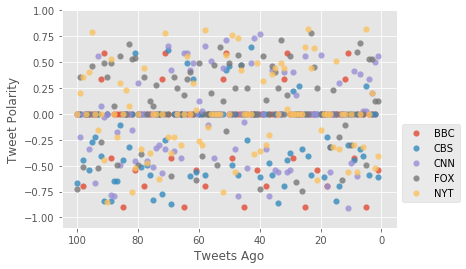

In [612]:
#x_vals = sentiments_pd["Tweets Ago"]
#y_vals = sentiments_pd["Compound"]
fig = plt.figure()
l = []
for k in source_DET:
    l.append(k)
#plot compound
    x_vals = [len(source_DET[k]) - x for x in range(len(source_DET[k]))]
    plt.xlim([max(x_vals),min(x_vals)])
    y_vals = source_DET[k]
    plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.10,
         alpha=0.8)

#plot positive
#y_vals = positive_list
#plt.scatter(x_vals,
 #        y_vals, marker="o", linewidth=0.10,
  #       alpha=0.8)

#plot negative
#x_vals = [x for x in range(len(compound_list))] #I don't need this line because it already been used in compound
#y_vals = negative_list
#plt.scatter(x_vals,
 #        y_vals, marker="o", linewidth=0.10,
  #       alpha=0.8)

#plt.legend(source_DET.keys(),loc=1)
plt.legend(source_DET.keys(), bbox_to_anchor=(1.0,0.5))
#plt.legend((source_DET.keys(),loc=1)loc='upper center', bbox_to_anchor=(0.5, -0.5),
#fancybox=True, shadow=True, ncol=5)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#fig = plt.figure()
plt.grid(True)
plt.ylim(-1.1,1)
plt.xlim(105,-5)
#plt.show()

In [613]:
fig.savefig('plotscatter.png')

In [614]:
source_sum.keys()

dict_keys(['BBC', 'CBS', 'CNN', 'FOX', 'NYT'])

In [615]:
source_color=('red', 'blue', 'purple', 'green', 'yellow')
source_color

('red', 'blue', 'purple', 'green', 'yellow')

In [616]:
source_sum.values()

dict_values([-8, -19, -2, 8, 1])

(-1.1, 1)

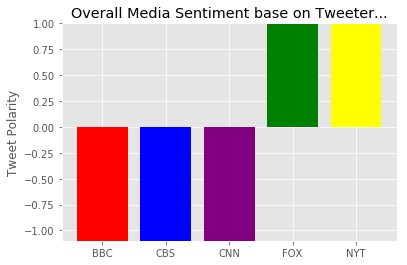

In [617]:
#plt.bar(range(len(NEWS_Media_pd.index)), NEWS_Media_pd.values)
fig = plt.figure()
plt.bar(source_sum.keys(), source_sum.values(),color=source_color)
#plt.xticks(rotation=45)
#plt.legend(['compound','positive','negative'],loc=1)
plt.ylabel("Tweet Polarity")
#plt.xlabel("Tweets Ago")
plt.title("Overall Media Sentiment base on Tweeter...")
plt.grid(True)
plt.ylim(-1.1,1)
#plt.show()

In [618]:
fig.savefig('plotBarr.png')